#### O desafio consiste em extrair, limpar e analisar dados sobre a atividade da vinicultura no Brasil nos últimos 15 anos. Deve-se separar a análise por país e desenvolver prospecções futuras que direcione ações visando o aumento das exportações. Para este desafio utilizaremos as bibliotecas do pandas, matplotlib e numpy, detalhando o que está sendo feito ao longo do processo.

### Armazenando todos links referente aos ultimos 15 anos e uma lista de links

In [1]:
import pandas as pd
import numpy as np
ano='20'        
periodo = [ ano + f'0{i}' if i < 10 else ano+f'{i}' for i in range(7,23) ]
urls=[]
for ano in periodo:
    urls.append(f'http://vitibrasil.cnpuv.embrapa.br/index.php?ano={ano}&opcao=opt_06&subopcao=subopt_01')
urls

['http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2007&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2008&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2009&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2010&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2011&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2012&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2013&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2014&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2015&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2016&opcao=opt_06&subopcao=subopt_01',
 'http://vitibrasil.cnpuv.embrapa.br/index.php?ano=2017&opcao=opt_06&subopcao=subopt_01',
 'http://v

### Armazenando todas as tabelas dos ultimos 15 anos em cada array da lista "dados_gerais"

In [2]:
dados_gerais = []
for url in urls:
    dados_gerais.append(pd.read_html(url, encoding='UTF-8')[3])


### Criando a coluna "Ano" referente a cada ano de 2007 a 2022

In [3]:
for i, ano in enumerate(periodo):
    lista_ano = [ ano for _ in range(dados_gerais[i].shape[0]) ]
    dados_gerais[i].insert(loc=0, column='Ano', value=lista_ano)

### Criando uma função para concatenar todas as 16 tabelas

In [4]:
df_concat = dados_gerais[0]

def func_concat(df, count):
#     print(dados_gerais[count])
    if count >= 0:
        if count == len(periodo)-1:
            df = pd.DataFrame()
            df = pd.concat([df, dados_gerais[count]])
            count-=1
            return func_concat(df, count)
        else:
            df = pd.concat([df, dados_gerais[count]])
            count-=1
            return func_concat(df, count)
    return df
    
novos_dados_gerais = func_concat(dados_gerais, len(periodo)-1)

### Usando o método ".pivot()" para indexar os países agrupando por ano

In [5]:
novos_dados_gerais_pivot = novos_dados_gerais.pivot(columns=['Ano'], index=['Países'], values=['Quantidade (Kg)', 'Valor (US$)'])

### Apagando a linha "NaN"

In [6]:
novos_dados_gerais_pivot.drop(axis=0, index=novos_dados_gerais_pivot.index[0], inplace=True)

### Tratamento de dados: substituir ' - ' por ' 0 ' e ' . ' por (vazio) para converter de string para inteiro 

In [7]:
import matplotlib.pyplot as plt

In [8]:
ano_colunas = novos_dados_gerais_pivot['Quantidade (Kg)'].columns

def str_to_number(df):
    df_qtd = pd.DataFrame()
    df_valor = pd.DataFrame()
    qtd = novos_dados_gerais_pivot['Quantidade (Kg)']
    valor = novos_dados_gerais_pivot['Valor (US$)']
    
    for i in range(len(ano_colunas)):
        aux = qtd.loc[:, ano_colunas[i]].str.replace('.', '', regex=True).str.replace('-', '0', regex=True).astype('int32')
        df_qtd = pd.concat([df_qtd, aux],axis=1)
        aux = valor.loc[:, ano_colunas[i]].str.replace('.', '', regex=True).str.replace('-', '0', regex=True).astype('int32')     
        df_valor = pd.concat([df_valor, aux], axis=1)
        
    return pd.concat([df_qtd, df_valor], axis=1, keys=['Quantidade (Kg)', 'Valor (US$)'])
dados_tratados = str_to_number(novos_dados_gerais_pivot)



### Quebrando a linha dos nomes muito longos dos indices no eixo X para não dar problema na plotagem

In [9]:
dados_tratados.rename(index={'Estados Unidos': 'Estados\nUnidos', 'Emirados Arabes Unidos': 'Emirados\nArabes\nUnidos'}, inplace=True)

### Inserindo a linha 'Total'

In [10]:
# dados_tratados = pd.concat([dados_tratados, pd.DataFrame(dados_tratados.sum(), columns=['Total']).T], axis=0)

### Plotando dois gráficos relacionando a quantidade e a receita de exportação ao longo dos anos

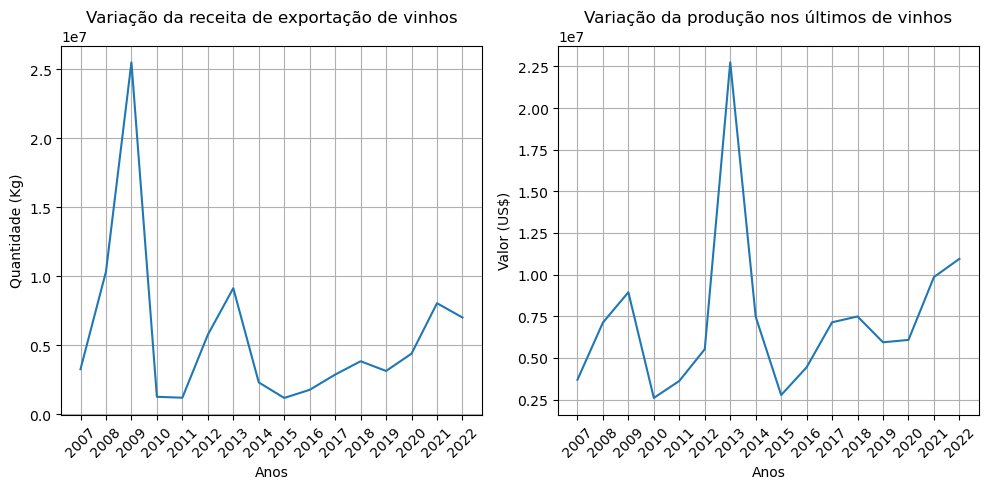

In [11]:

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10,5))
x = dados_tratados['Quantidade (Kg)'].columns
y1 = dados_tratados['Quantidade (Kg)'].loc['Total']
y2 = dados_tratados['Valor (US$)'].loc['Total']
y1
ax1.plot(x, y1)
ax2.plot(x, y2)
ax1.grid()
ax2.grid()

ax1.set_xticks(x)
ax1.set_xticklabels(x, rotation=45)

ax2.set_xticks(x)
ax2.set_xticklabels(x, rotation=45)

ax1.set_xlabel('Anos')
ax1.set_ylabel('Quantidade (Kg)')
ax1.set_title('Variação da receita de exportação de vinhos')

ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor (US$)')
ax2.set_title('Variação da produção nos últimos de vinhos')

plt.tight_layout()
plt.show()

### Sobrepondo os dois gráficos acima

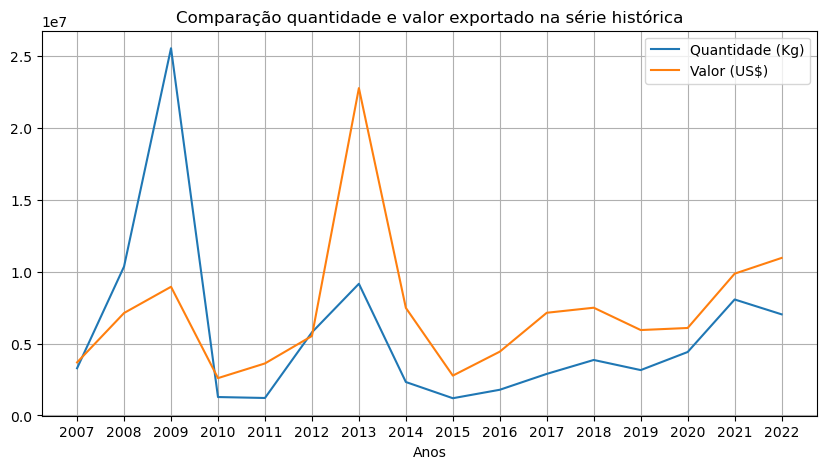

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
x = dados_tratados['Quantidade (Kg)'].columns
y1 = dados_tratados['Quantidade (Kg)'].loc['Total']
y2 = dados_tratados['Valor (US$)'].loc['Total']

ax.plot(x, y1)
ax.plot(x, y2)
ax.grid()
ax.legend(['Quantidade (Kg)','Valor (US$)'])
ax.set_xlabel('Anos')
ax.set_title('Comparação quantidade e valor exportado na série histórica')
plt.show()

### Plotando o gráfico com a quantidade e receita de expotação dos 10 primeiros países importadores em 2022

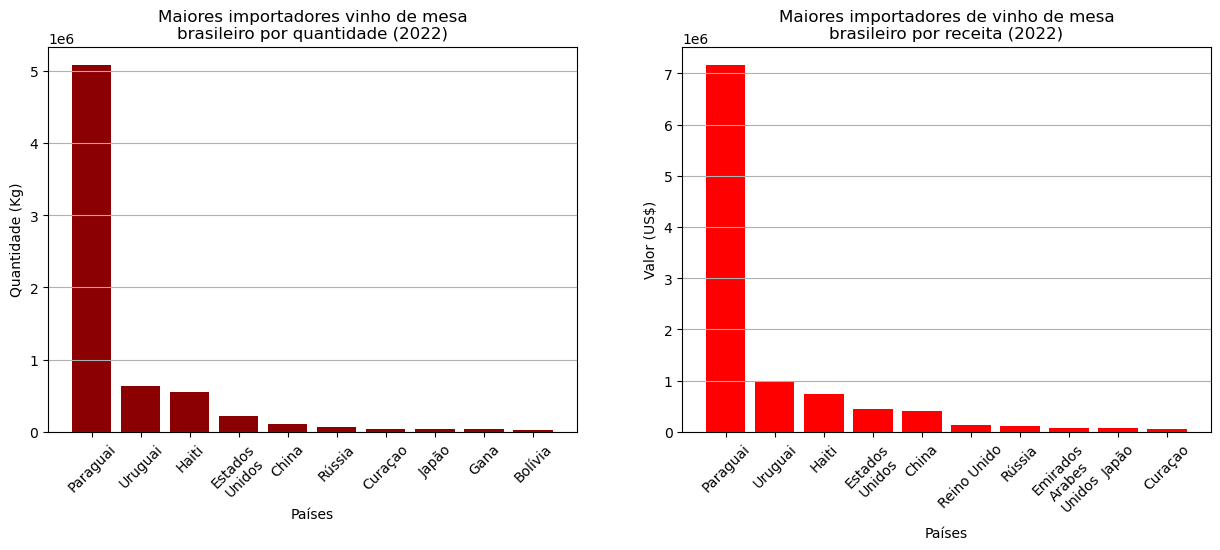

In [13]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15,5))

colunas_sem_total = ~dados_tratados.index.isin(['Total'])

selecao_quantidade = dados_tratados['Quantidade (Kg)'][colunas_sem_total].loc[:,'2022'].sort_values(ascending=False)
selecao_valor = dados_tratados['Valor (US$)'][colunas_sem_total].loc[:,'2022'].sort_values(ascending=False)

# ---- 'Quantidade (Kg)' ----
x1 = selecao_quantidade.head(10).index
y1 = selecao_quantidade.head(10)

ax1.bar(x1,y1, color='darkred') 
ax1.set_xticks(x1)
ax1.set_xticklabels(x1, rotation=45)
ax1.set_xlabel('Países')
ax1.set_ylabel('Quantidade (Kg)')
ax1.set_title('Maiores importadores vinho de mesa\nbrasileiro por quantidade (2022)')
ax1.grid(axis='y')

# ---- 'Valor (US$)' ----
x2 = selecao_valor.head(10).index
y2 = selecao_valor.head(10)

ax2.bar(x2,y2, color='red') # valor
ax2.set_xticks(x2)
ax2.set_xticklabels(x2, rotation=45)
ax2.set_xlabel('Países')
ax2.set_ylabel('Valor (US$)')
ax2.set_title('Maiores importadores de vinho de mesa\nbrasileiro por receita (2022)')
ax2.grid(axis='y')
# plt.tight_layout()
plt.show()

#### Para auxiliar nas nossas análises, optamos pela dimensão econômica (taxa de câmbio dólar-real) para efeitos comparativos entre exportação e valor do dólar em reais.

In [14]:
cotacao_dolar = pd.read_html('http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=31924', encoding='UTF-8')

In [15]:
dolar = cotacao_dolar[2]

In [16]:
dolar.columns = [cotacao_dolar[2].loc[0][0], cotacao_dolar[2].loc[0][1]]

In [17]:
dolar.drop(index=0, axis=0, inplace=True)

In [18]:
dolar_copy = dolar.copy()

In [19]:
dolar = dolar.set_index('Data')[dolar[dolar['Data'] == '1991'].index[0]-1:]

In [20]:
dolar = dolar.iloc[:,0].astype('float64').apply(lambda x: x/10000)

In [21]:
dolar = pd.DataFrame(dolar)

In [22]:
dolar.reset_index(inplace=True)

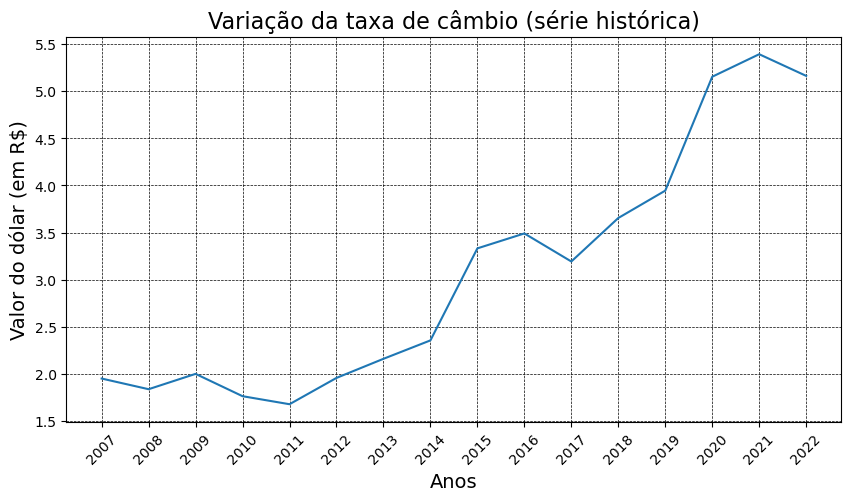

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
x=dolar['Data']
y=dolar[dolar.columns[1]]

ax.plot(x[16:],y[16:])

ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
ax.set_xlabel('Anos', size=14)
ax.set_ylabel('Valor do dólar (em R$)', size=14)
ax.set_title('Variação da taxa de câmbio (série histórica)', size=16)
ax.plot()
ax.grid(linestyle = '--', linewidth = 0.5, color='black')
plt.show()

#### Plotando dois graficos (taxa de câmbio e receita exportação) lado a lado

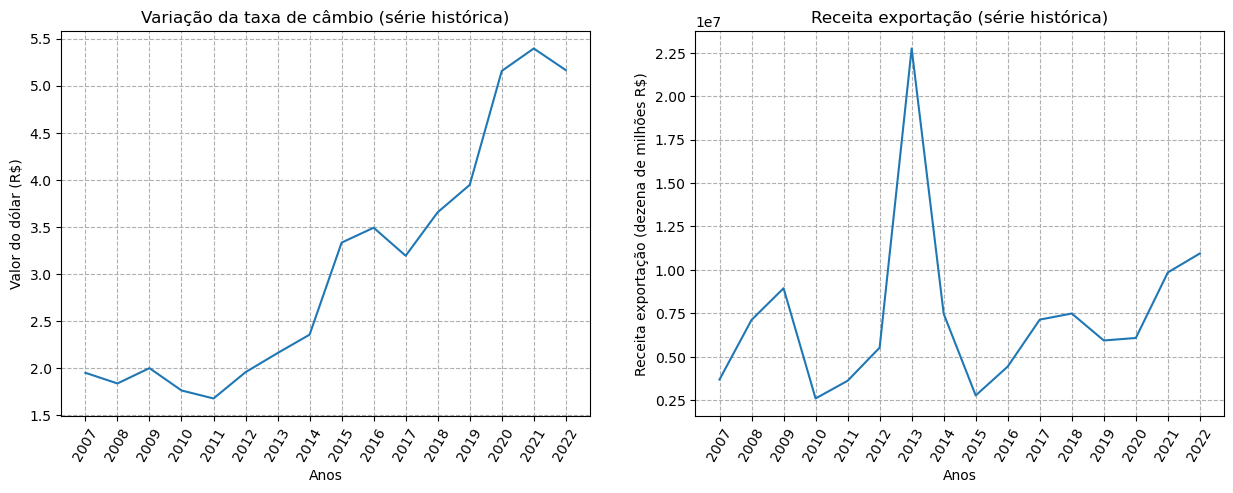

In [95]:
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(15,5))

colunas_sem_total = ~dados_tratados.index.isin(['Total'])

x=dolar['Data']
y=dolar[dolar.columns[1]]
x1 = dados_tratados['Valor (US$)'].columns
y1 = dados_tratados['Valor (US$)'].loc['Total']

ax1.plot(x[16:],y[16:])
ax1.set_xticks(x[16:])
ax1.set_xlabel('Anos')
ax1.set_ylabel('Valor do dólar (R$)')
ax1.set_title('Variação da taxa de câmbio (série histórica)')
ax1.set_xticklabels(x[16:], rotation=60)
ax1.grid(linestyle='--')

ax2.plot(x1,y1)
ax2.set_xticks(x1)
ax2.set_xlabel('Anos')
ax2.set_ylabel('Receita exportação (dezena de milhões R$)')
ax2.set_title('Receita exportação (série histórica)')
ax2.set_xticklabels(x1, rotation=60)
ax2.grid(linestyle='--')

plt.show()


#### Utilizando a função twinx para projetar os dois graficos de forma sobreposta

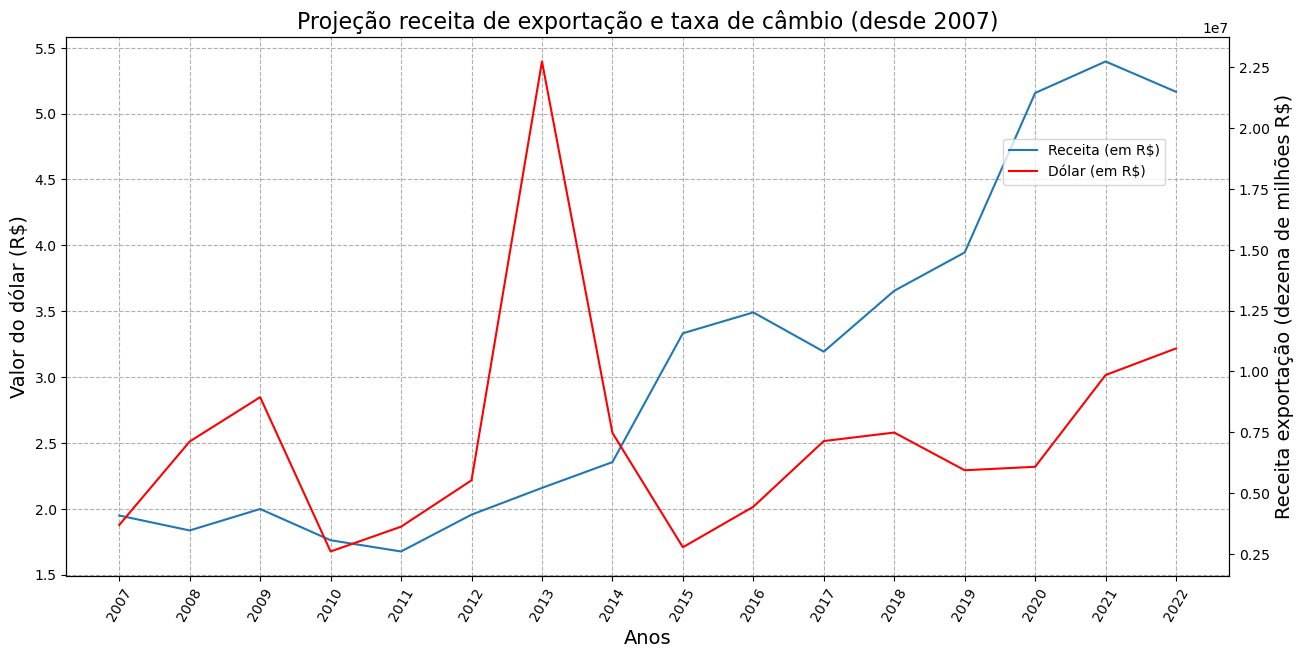

In [87]:
fig, ax1 = plt.subplots(figsize=(15,7))

colunas_sem_total = ~dados_tratados.index.isin(['Total'])

x=dolar['Data']
y=dolar[dolar.columns[1]]
x1 = dados_tratados['Valor (US$)'].columns
y1 = dados_tratados['Valor (US$)'].loc['Total']

ax1.plot(x[16:],y[16:], label='Receita (em R$)')
ax1.set_xticks(x[16:])
ax1.set_xlabel('Anos', size=14)
ax1.set_ylabel('Valor do dólar (R$)', size=14)
ax1.set_xticklabels(x[16:], rotation=60)
ax1.grid(linestyle='--')
ax1.set_title('Projeção receita de exportação e taxa de câmbio (desde 2007)',size=16)

ax2 = ax1.twinx()

ax2.plot(x1,y1, color='red', label='Dólar (em R$)')
ax2.set_xticks(x1)
ax2.set_ylabel('Receita exportação (dezena de milhões R$)', size=14)
fig.legend(loc="upper right",borderaxespad= 10)
# plt.tight_layout()
plt.show()


### Explicação: 
#### No gráfico constata-se a evolução das exportações de vinho entre o ano de 2011 a 2020. No período de 2012 a 2013 as exportações tiveram um crescimento significativo, com destaque para o ano de 2013 quando ocorreu um aumento expressivo no volume exportado, passando de 1,480,022 quilogramas líquidos em 2011 para 20,238,982 quilogramas líquidos em 2013, representando alta de 1267%, porém, aliado a isto uma desvalorização no valor do produto no ano de 2013. Fato ocorrido pela exportação do vinho a granel, tanto o de mesa quanto o vinho fino de baixo valor agregado, isso porque, de acordo com Mello (2015), o setor se beneficiou do programa de escoamento de produção (PEP), pois havia vantagem competitiva no mercado internacional para adotá-lo, o que não ocorreu nos anos seguintes, No período de 2014 a 2015, houve uma diminuição brusca no volume exportado de 1171%, em relação ao ano de 2013, fato ocorrido pela não adoção ao PEP, em contrapartida houve um aumento na valorização do produto. No período entre 2016 a 2018 o volume de exportações alcançou um aumento de 91%, tal performance pode estar relacionado ao desempenho dos vinhos brasileiros em premiações internacionais, já em 2019 houve uma pequena queda de 6%. Em 2020 houve um aumento de 27% comparado ao ano anterior. Ao avaliar o período pós 2013, demostra-se que o país buscou vender vinhos finos de maior valor agregado.

##### Fonte: https://releia.ifsertao-pe.edu.br/jspui/bitstream/123456789/821/1/TCC%20-%20PANORAMA%20DA%20EXPORTAÇÃO%20E%20IMPORTAÇÃO%20DE%20VINHOS%20NO%20BRASIL.pdf
